In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML
from IPython.display import display, Math
from statsmodels.graphics.tsaplots import plot_pacf

np.random.seed(42)
T = 150
t = np.arange(T)

# Predictors
x1 = np.random.normal(0, 1, T)
x2 = np.random.normal(0, 1, T)

# True coefficients
intercept = 5.0
beta1, beta2 = 2.0, -1.5
beta3, beta4, beta5 = 3.0, 1.2, -0.8
delta = 0.4  # time trend

# Generate y
y = (
    intercept + beta1 * x1 + beta2 * x2 + beta3 * x1 * x2 +
    beta4 * x1**2 + beta5 * x2**2 + delta * t +
    np.random.normal(0, 1, T)
)

# Create DataFrame
df = pd.DataFrame({'t': t, 'x1': x1, 'x2': x2, 'y': y})
df['x1_x2'] = df['x1'] * df['x2']
df['x1_sq'] = df['x1']**2
df['x2_sq'] = df['x2']**2

# Differences
df_diff = df.diff().dropna()
df_diff['interaction'] = (
    df['x1'].iloc[1:].values * df['x2'].iloc[1:].values -
    df['x1'].shift(1).iloc[1:].values * df['x2'].shift(1).iloc[1:].values
)

df_diff['x1_sq_diff'] = (
    df['x1'].iloc[1:].values**2 - df['x1'].shift(1).iloc[1:].values**2
)

df_diff['x2_sq_diff'] = (
    df['x2'].iloc[1:].values**2 - df['x2'].shift(1).iloc[1:].values**2
)




In [163]:
df.head(10)

,t,x1,x2,y,x1_x2,x1_sq,x2_sq
0,0,0.497,0.250,5.408,0.124,0.247,0.063
1,1,-0.138,0.346,3.827,-0.048,0.019,0.120
2,2,0.648,-0.680,7.675,-0.440,0.420,0.462
3,3,1.523,0.232,13.310,0.354,2.320,0.054
4,4,-0.234,0.293,5.462,-0.069,0.055,0.086
5,5,-0.234,-0.714,7.880,0.167,0.055,0.510
6,6,1.579,1.866,18.085,2.946,2.494,3.481
7,7,0.767,0.474,9.651,0.364,0.589,0.225
8,8,-0.469,-1.191,10.402,0.559,0.220,1.419
9,9,0.543,0.657,9.575,0.356,0.294,0.431


In [164]:
# Models
model_level_lin_no_t = LinearRegression().fit(df[['x1', 'x2']], df['y'])
model_level = LinearRegression().fit(df[['x1', 'x2', 'x1_x2', 'x1_sq', 'x2_sq', 't']], df['y'])
model_level_no_t = LinearRegression().fit(df[['x1', 'x2', 'x1_x2', 'x1_sq', 'x2_sq']], df['y'])
model_diff_lin = LinearRegression().fit(df_diff[['x1', 'x2']], df_diff['y'])
model_diff_nl = LinearRegression().fit(df_diff[['x1', 'x2', 'interaction', 'x1_sq_diff', 'x2_sq_diff']], df_diff['y'])

# Coefficients
print
print("Linear model (no time):\n", model_level_lin_no_t.coef_)
print("\nLevel Model (no time) Coefficients:\n", model_level_no_t.coef_)
print("Non linear model with time Coefficients:\n", model_level.coef_)
print("\nDifference Model (linear) Coefficients:\n", model_diff_lin.coef_)
print("\nDifference Model (nonlinear) Coefficients:\n", model_diff_nl.coef_)

Linear model (no time):
 [ 2.02828033 -2.64597719]

Level Model (no time) Coefficients:
 [ 2.5330505  -2.52395169  1.94287641  1.70634326 -0.35672324]
Non linear model with time Coefficients:
 [ 1.97246722 -1.43919576  2.8993799   1.28804683 -0.8096937   0.39815458]

Difference Model (linear) Coefficients:
 [ 1.08617751 -1.28648763]

Difference Model (nonlinear) Coefficients:
 [ 1.93641306 -1.41201963  2.9349989   1.25216181 -0.87872543]


In [165]:
model_level.intercept_

5.114820429411164

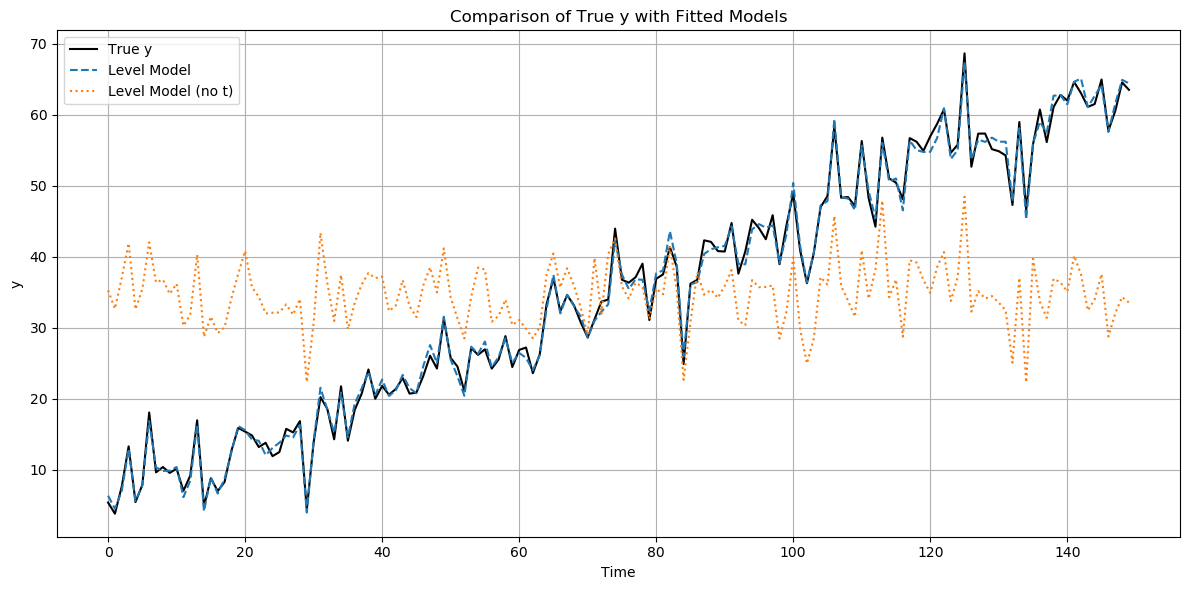

In [166]:
plt.figure(figsize=(12, 6))
plt.plot(t, y, label="True y", color="black")
plt.plot(t, model_level.predict(df[['x1', 'x2', 'x1_x2', 'x1_sq', 'x2_sq', 't']]), label="Level Model", linestyle='--')
plt.plot(t, model_level_no_t.predict(df[['x1', 'x2', 'x1_x2', 'x1_sq', 'x2_sq']]), label="Level Model (no t)", linestyle=':')
plt.xlabel("Time")
plt.ylabel("y")
plt.title("Comparison of True y with Fitted Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [167]:
# Construct coefficient table
coef_table = pd.DataFrame({
    'True Coef': [intercept, beta1, beta2, beta3, beta4, beta5, delta],
    'Lin model (no t)': [model_level_lin_no_t.intercept_]+list(model_level_lin_no_t.coef_) + 4*[np.nan],
    'Non-lin model (no t)': [model_level_lin_no_t.intercept_]+list(model_level_no_t.coef_) + [np.nan],
    'Non-lin model (with t)': [model_level.intercept_]+list(model_level.coef_),
}, index=['intercept', 'x1', 'x2', 'x1*x2', 'x1^2', 'x2^2', 'time'])

# Display

# pd.set_option('display.float_format', '{:.2f}'.format)
# pd.set_option('display.width', None)
# pd.set_option('display.max_columns', None)
# print(coef_table)

In [168]:
from IPython.display import display, HTML

# Optional: round the values for better display
coef_table_rounded = coef_table.round(3)

# Display as styled HTML table
display(HTML(coef_table_rounded.to_html()))

,True Coef,Lin model (no t),Non-lin model (no t),Non-lin model (with t)
intercept,5.000,35.086,35.086,5.115
x1,2.000,2.028,2.533,1.972
x2,-1.500,-2.646,-2.524,-1.439
x1*x2,3.000,NaN,1.943,2.899
x1^2,1.200,NaN,1.706,1.288
x2^2,-0.800,NaN,-0.357,-0.810
time,0.400,NaN,NaN,0.398


In [169]:
# Construct coefficient table
coef_table = pd.DataFrame({
    'True Coef': [intercept, beta1, beta2, beta3, beta4, beta5, delta],
    'Diff (linear only)': [model_diff_lin.intercept_] + list(model_diff_lin.coef_) + [np.nan] * 4,
    'Diff (nonlinear)': [model_diff_nl.intercept_] + list(model_diff_nl.coef_) + [np.nan] * (6 - len(model_diff_nl.coef_))
}, index=['intercept','Δx1', 'Δx2', 'Δ(x1*x2)', 'Δ(x1^2)', 'Δ(x2^2)', 'time'])

# Display
pd.set_option('display.float_format', '{:.3f}'.format)
print(coef_table)

           True Coef  Diff (linear only)  Diff (nonlinear)
intercept      5.000               0.395             0.398
Δx1            2.000               1.086             1.936
Δx2           -1.500              -1.286            -1.412
Δ(x1*x2)       3.000                 NaN             2.935
Δ(x1^2)        1.200                 NaN             1.252
Δ(x2^2)       -0.800                 NaN            -0.879
time           0.400                 NaN               NaN


In [170]:
from IPython.display import display, HTML

# Optional: round the values for better display
coef_table_rounded = coef_table.round(3)

# Display as styled HTML table
display(HTML(coef_table_rounded.to_html()))

,True Coef,Diff (linear only),Diff (nonlinear)
intercept,5.000,0.395,0.398
Δx1,2.000,1.086,1.936
Δx2,-1.500,-1.286,-1.412
Δ(x1*x2),3.000,NaN,2.935
Δ(x1^2),1.200,NaN,1.252
Δ(x2^2),-0.800,NaN,-0.879
time,0.400,NaN,NaN


In [216]:
from IPython.display import display, Math

# Forward Difference Model
display(Math(r"""
\Delta^{\text{forward}} y_t = y_{t+1} - y_t = 
\beta_1 (x_{1,t+1} - x_{1,t}) + 
\beta_2 (x_{2,t+1} - x_{2,t}) + 
\beta_3 (x_{1,t+1}x_{2,t+1} - x_{1,t}x_{2,t}) + 
\beta_4 (x_{1,t+1}^2 - x_{1,t}^2) + 
\beta_5 (x_{2,t+1}^2 - x_{2,t}^2) + \delta + \varepsilon_t
"""))

# Backward Difference Model
display(Math(r"""
\Delta^{\text{backward}} y_t = y_t - y_{t-1} = 
\beta_1 (x_{1,t} - x_{1,t-1}) + 
\beta_2 (x_{2,t} - x_{2,t-1}) + 
\beta_3 (x_{1,t}x_{2,t} - x_{1,t-1}x_{2,t-1}) + 
\beta_4 (x_{1,t}^2 - x_{1,t-1}^2) + 
\beta_5 (x_{2,t}^2 - x_{2,t-1}^2) + \delta + \varepsilon_t
"""))

# Centered Difference Model
display(Math(r"""
\Delta^{\text{centered}} y_t = y_{t+1} - y_{t-1} = 
\beta_1 (x_{1,t+1} - x_{1,t-1}) + 
\beta_2 (x_{2,t+1} - x_{2,t-1}) + 
\beta_3 (x_{1,t+1}x_{2,t+1} - x_{1,t-1}x_{2,t-1}) + 
\beta_4 (x_{1,t+1}^2 - x_{1,t-1}^2) + 
\beta_5 (x_{2,t+1}^2 - x_{2,t-1}^2) + 2\delta + \varepsilon_t
"""))

# Smoothed Centered Difference Model
display(Math(r"""
\Delta^{\text{smooth}} y_t = \frac{1}{2}[(y_{t+2} - y_{t-2}) + (y_{t+1} - y_{t-1})] = 
\beta_1 \Delta^{\text{smooth}} x_{1,t} + 
\beta_2 \Delta^{\text{smooth}} x_{2,t} + 
\beta_3 \Delta^{\text{smooth}} (x_1 x_2)_t + 
\beta_4 \Delta^{\text{smooth}} (x_1^2)_t + 
\beta_5 \Delta^{\text{smooth}} (x_2^2)_t + 2\delta + \varepsilon_t
"""))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [82]:
import numpy as np
import pandas as pd

# Seed and data generation
np.random.seed(42)
T = 100
t = np.arange(T)
x1 = np.random.normal(0, 1, T)
x2 = np.random.normal(0, 1, T)

# True coefficients
intercept = 5.0
beta1, beta2 = 2.0, -1.5
beta3, beta4, beta5 = 3.0, 1.2, -0.8
delta = 0.4
phi = 0.6

# Generate target variable y

autoregressive = False

if autoregressive == False:
    y = (
        intercept + beta1 * x1 + beta2 * x2 + beta3 * x1 * x2 +
        beta4 * x1**2 + beta5 * x2**2 + delta * t +
        np.random.normal(0, 1, T)
    )

else:
    # Generate autoregressive y
    y = np.zeros(T)
    eps = np.random.normal(0, 1, T)
    y[0] = (
        intercept + beta1 * x1[0] + beta2 * x2[0] + beta3 * x1[0] * x2[0] +
        beta4 * x1[0]**2 + beta5 * x2[0]**2 + delta * t[0] + eps[0]
    )
    for i in range(1, T):
        y[i] = (
            intercept + beta1 * x1[i] + beta2 * x2[i] + beta3 * x1[i] * x2[i] +
            beta4 * x1[i]**2 + beta5 * x2[i]**2 + delta * t[i] +
            phi * y[i - 1] + eps[i]
    )
# Original DataFrame
df = pd.DataFrame({'t': t, 'x1': x1, 'x2': x2, 'y': y})


# Backward differencing
df['delta_y_backward'] = df['y'] - df['y'].shift(1)
df['delta_x1_backward'] = df['x1'] - df['x1'].shift(1)
df['delta_x2_backward'] = df['x2'] - df['x2'].shift(1)


df['delta_interaction_backward'] = (
    df['x1'] * df['x2'] - df['x1'].shift(1) * df['x2'].shift(1)
)

df['delta_x1_sq_backward'] = df['x1']**2 - df['x1'].shift(1)**2
df['delta_x2_sq_backward'] = df['x2']**2 - df['x2'].shift(1)**2


# Forward differencing
df['delta_y_forward'] = df['y'].shift(-1) - df['y']
df['delta_x1_forward'] = df['x1'].shift(-1) - df['x1']
df['delta_x2_forward'] = df['x2'].shift(-1) - df['x2']


df['delta_interaction_forward'] = (
    df['x1'].shift(-1) * df['x2'].shift(-1) - df['x1'] * df['x2']
)

df['delta_x1_sq_forward'] = df['x1'].shift(-1)**2 - df['x1']**2
df['delta_x2_sq_forward'] = df['x2'].shift(-1)**2 - df['x2']**2


# Centered difference
df['delta_y'] = df['y'].shift(-1) - df['y'].shift(1)
df['delta_x1'] = df['x1'].shift(-1) - df['x1'].shift(1)
df['delta_x2'] = df['x2'].shift(-1) - df['x2'].shift(1)

df['delta_interaction'] = (
    df['x1'].shift(-1) * df['x2'].shift(-1) -
    df['x1'].shift(1) * df['x2'].shift(1)
)

df['delta_x1_sq'] = df['x1'].shift(-1)**2 - df['x1'].shift(1)**2
df['delta_x2_sq'] = df['x2'].shift(-1)**2 - df['x2'].shift(1)**2


# Smoothed centered difference

df['delta_y_smooth'] = 0.5 * ((df['y'].shift(-2) - df['y'].shift(2)) + (df['y'].shift(-1) - df['y'].shift(1)))
df['delta_x1_smooth'] = 0.5 * ((df['x1'].shift(-2) - df['x1'].shift(2)) + (df['x1'].shift(-1) - df['x1'].shift(1)))
df['delta_x2_smooth'] = 0.5 * ((df['x2'].shift(-2) - df['x2'].shift(2)) + (df['x2'].shift(-1) - df['x2'].shift(1)))


interaction_forward_2 = df['x1'].shift(-2) * df['x2'].shift(-2)
interaction_backward_2 = df['x1'].shift(2) * df['x2'].shift(2)
interaction_forward_1 = df['x1'].shift(-1) * df['x2'].shift(-1)
interaction_backward_1 = df['x1'].shift(1) * df['x2'].shift(1)

df['delta_interaction_smooth'] = 0.5 * ((interaction_forward_2 - interaction_backward_2) + 
                                        (interaction_forward_1 - interaction_backward_1))

df['delta_x1_sq_smooth'] = 0.5 * ((df['x1'].shift(-2)**2 - df['x1'].shift(2)**2) + 
                                  (df['x1'].shift(-1)**2 - df['x1'].shift(1)**2))

df['delta_x2_sq_smooth'] = 0.5 * ((df['x2'].shift(-2)**2 - df['x2'].shift(2)**2) + 
                                  (df['x2'].shift(-1)**2 - df['x2'].shift(1)**2))

df_clean = df.dropna().reset_index(drop=True)

df_clean.describe()

,t,x1,x2,y,delta_y_backward,delta_x1_backward,delta_x2_backward,delta_interaction_backward,delta_x1_sq_backward,delta_x2_sq_backward,...,delta_x2,delta_interaction,delta_x1_sq,delta_x2_sq,delta_y_smooth,delta_x1_smooth,delta_x2_smooth,delta_interaction_smooth,delta_x1_sq_smooth,delta_x2_sq_smooth
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,49.500000,-0.109517,0.053659,24.490936,0.398031,0.004160,0.005983,-0.000188,0.000511,-0.001597,...,0.010159,0.002128,-0.003859,-0.002785,1.174302,-0.012733,0.011153,0.012186,-0.016482,-0.005698
std,27.856777,0.924852,0.953234,12.069214,7.193663,1.321527,1.417862,1.460207,1.677090,1.987988,...,1.385617,1.433482,1.783515,1.883416,5.051462,0.941931,0.965636,1.005707,1.213230,1.173165
min,2.000000,-2.619745,-1.918771,-11.269930,-25.970739,-4.184389,-3.180992,-5.382239,-6.187541,-7.007861,...,-3.577327,-4.971906,-6.855487,-6.664601,-13.220833,-1.650027,-2.191781,-3.055902,-4.607096,-3.205595
25%,25.750000,-0.612560,-0.788009,14.286392,-2.776404,-0.983747,-1.031652,-0.672526,-0.694495,-0.672634,...,-0.934539,-0.774611,-0.604152,-0.564389,-1.258186,-0.746607,-0.580192,-0.447369,-0.681029,-0.611804
50%,49.500000,-0.150654,0.163453,23.726488,0.107668,-0.001148,0.067261,-0.150515,-0.016597,0.044891,...,0.096677,-0.063856,-0.011215,-0.020390,1.499943,-0.059362,0.052031,0.060576,-0.020375,0.011459
75%,73.250000,0.410090,0.596560,34.642392,4.026337,0.911903,1.075970,0.637126,0.747787,0.611019,...,0.998908,0.634534,0.600683,0.592058,3.827151,0.643255,0.672691,0.526644,0.666187,0.741131
max,97.000000,1.852278,2.720169,44.912704,24.307303,3.441648,2.984826,5.269082,4.414955,7.329277,...,3.592307,5.100422,6.861781,6.066859,16.060222,2.098846,2.258345,2.281950,3.407505,3.392481


In [56]:
#model_diff_nl_backward = LinearRegression().fit(df_diff[['x1', 'x2', 'interaction', 'x1_sq_diff', 'x2_sq_diff']], df_diff['y'])

model_diff_nl_backward = LinearRegression().fit(df_clean[['delta_x1_backward', 'delta_x2_backward',
    'delta_interaction_backward', 'delta_x1_sq_backward', 'delta_x2_sq_backward']], df_clean['delta_y_backward'])

model_diff_nl_forward = LinearRegression().fit(df_clean[['delta_x1_forward', 'delta_x2_forward',
    'delta_interaction_forward', 'delta_x1_sq_forward', 'delta_x2_sq_forward']], df_clean['delta_y_forward'])

model_diff_nl_centered = LinearRegression().fit(df_clean[['delta_x1', 'delta_x2', 'delta_interaction', 'delta_x1_sq', 'delta_x2_sq']], df_clean['delta_y'])

model_diff_nl_centered_smoothed = LinearRegression().fit(df_clean[['delta_x1_smooth', 'delta_x2_smooth',
    'delta_interaction_smooth', 'delta_x1_sq_smooth', 'delta_x2_sq_smooth']], df_clean['delta_y_smooth'])

In [57]:
# Construct coefficient table
coef_table = pd.DataFrame({
    'True Coef': [intercept, beta1, beta2, beta3, beta4, beta5, delta],
    'Diff_model_backward': [model_diff_nl_backward.intercept_] + list(model_diff_nl_backward.coef_) + [np.nan] * (6 - len(model_diff_nl_backward.coef_)),
    'Diff_model_forward': [model_diff_nl_forward.intercept_] + list(model_diff_nl_forward.coef_) + [np.nan] * (6 - len(model_diff_nl_forward.coef_)),
    'Diff_model_centered': [model_diff_nl_centered.intercept_] + list(model_diff_nl_centered.coef_) + [np.nan] * (6 - len(model_diff_nl_centered.coef_)),
    'Diff_model_centered_smoothed': [model_diff_nl_centered_smoothed.intercept_] + list(model_diff_nl_centered_smoothed.coef_) + [np.nan] * (6 - len(model_diff_nl_centered.coef_)),
}, index=['intercept','Δx1', 'Δx2', 'Δ(x1*x2)', 'Δ(x1^2)', 'Δ(x2^2)', 'time'])


In [58]:
from IPython.display import display, HTML

# Optional: round the values for better display
coef_table_rounded = coef_table.round(3)

# Display as styled HTML table
if autoregressive == True:
    display(Math(r'y_t = \alpha + \beta_1 x_{1,t} + \beta_2 x_{2,t} + \beta_3 x_{1,t} x_{2,t} + \beta_4 x_{1,t}^2 + \beta_5 x_{2,t}^2 + \delta t + \phi y_{t-1} + \varepsilon_t'))
else:
    display(Math(r'y_t = \alpha + \beta_1 x_{1,t} + \beta_2 x_{2,t} + \beta_3 x_{1,t} x_{2,t} + \beta_4 x_{1,t}^2 + \beta_5 x_{2,t}^2 + \delta t + \varepsilon_t'))
display(HTML(coef_table_rounded.to_html()))

<IPython.core.display.Math object>

,True Coef,Diff_model_backward,Diff_model_forward,Diff_model_centered,Diff_model_centered_smoothed
intercept,5.0,0.396,0.398,0.795,1.201
Δx1,2.0,2.248,2.244,2.148,2.266
Δx2,-1.5,-1.399,-1.399,-1.504,-1.668
Δ(x1*x2),3.0,3.005,3.006,3.108,2.832
Δ(x1^2),1.2,1.119,1.117,1.115,1.136
Δ(x2^2),-0.8,-0.785,-0.785,-0.661,-0.793
time,0.4,NaN,NaN,NaN,NaN


<Figure size 1000x400 with 0 Axes>

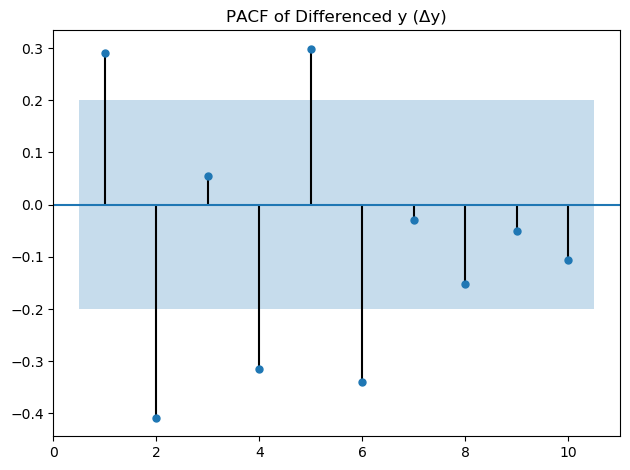

In [210]:
# Plot PACF of differenced y
plt.figure(figsize=(10, 4))
plot_pacf(df_clean['delta_y'], lags=10, method='ywmle', zero=False)
plt.title("PACF of Differenced y (Δy)")
plt.tight_layout()
plt.show()

In [213]:
from IPython.display import display, Math

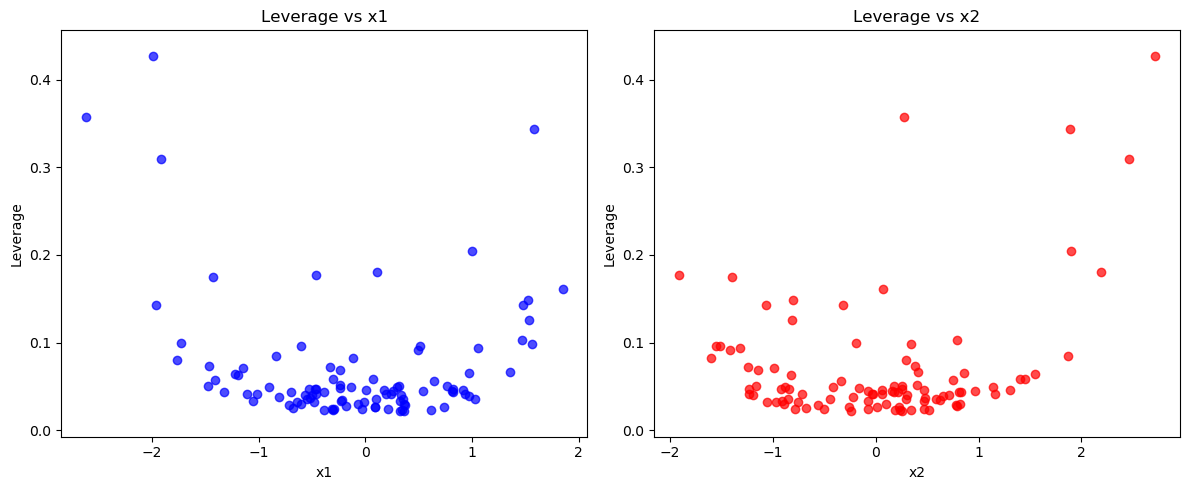

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data generation
np.random.seed(42)
T = 100
t = np.arange(T)
x1 = np.random.normal(0, 1, T)
x2 = np.random.normal(0, 1, T)

intercept = 5.0
beta1, beta2 = 2.0, -1.5
beta3, beta4, beta5 = 3.0, 1.2, -0.8
delta = 0.4
phi = 0.6

# Autoregressive y
y = np.zeros(T)
eps = np.random.normal(0, 1, T)
y[0] = (
    intercept + beta1 * x1[0] + beta2 * x2[0] + beta3 * x1[0] * x2[0] +
    beta4 * x1[0]**2 + beta5 * x2[0]**2 + delta * t[0] + eps[0]
)
for i in range(1, T):
    y[i] = (
        intercept + beta1 * x1[i] + beta2 * x2[i] + beta3 * x1[i] * x2[i] +
        beta4 * x1[i]**2 + beta5 * x2[i]**2 + delta * t[i] +
        phi * y[i - 1] + eps[i]
)

# DataFrame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Fit linear regression (ignoring AR structure for leverage computation)
X = sm.add_constant(np.column_stack((x1, x2, x1 * x2, x1**2, x2**2, t)))
model = sm.OLS(y, X).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag

df['leverage'] = leverage

# Plot leverage vs x1, x2
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(df['x1'], df['leverage'], color='blue', alpha=0.7)
axs[0].set_title("Leverage vs x1")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("Leverage")

axs[1].scatter(df['x2'], df['leverage'], color='red', alpha=0.7)
axs[1].set_title("Leverage vs x2")
axs[1].set_xlabel("x2")
axs[1].set_ylabel("Leverage")

plt.tight_layout()
plt.show()


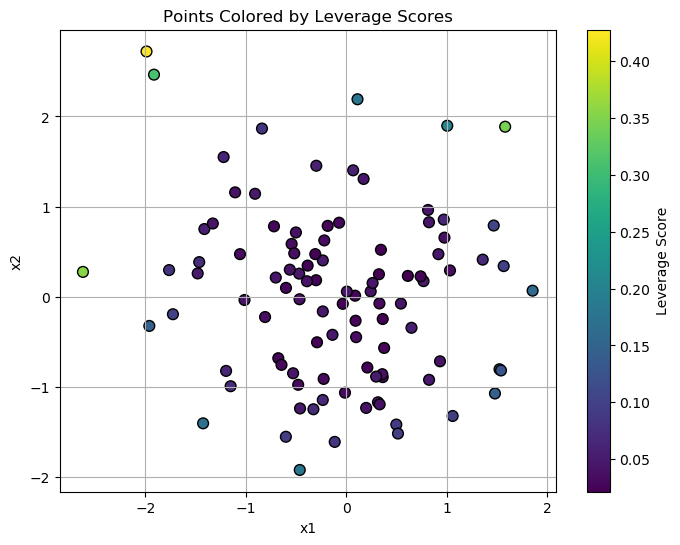

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Data generation ---
np.random.seed(42)
T = 100
t = np.arange(T)
x1 = np.random.normal(0, 1, T)
x2 = np.random.normal(0, 1, T)

intercept = 5.0
beta1, beta2 = 2.0, -1.5
beta3, beta4, beta5 = 3.0, 1.2, -0.8
delta = 0.4
phi = 0.6

# Autoregressive y
y = np.zeros(T)
eps = np.random.normal(0, 1, T)
y[0] = (
    intercept + beta1 * x1[0] + beta2 * x2[0] + beta3 * x1[0] * x2[0] +
    beta4 * x1[0]**2 + beta5 * x2[0]**2 + delta * t[0] + eps[0]
)
for i in range(1, T):
    y[i] = (
        intercept + beta1 * x1[i] + beta2 * x2[i] + beta3 * x1[i] * x2[i] +
        beta4 * x1[i]**2 + beta5 * x2[i]**2 + delta * t[i] +
        phi * y[i - 1] + eps[i]
)

# --- Leverage score calculation ---
X = sm.add_constant(np.column_stack((x1, x2, x1 * x2, x1**2, x2**2, t)))
model = sm.OLS(y, X).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag

# --- Plotting ---
plt.figure(figsize=(8, 6))
sc = plt.scatter(x1, x2, c=leverage, cmap='viridis', s=60, edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Points Colored by Leverage Scores")
plt.colorbar(sc, label="Leverage Score")
plt.grid(True)
plt.show()


/Users/vayu/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


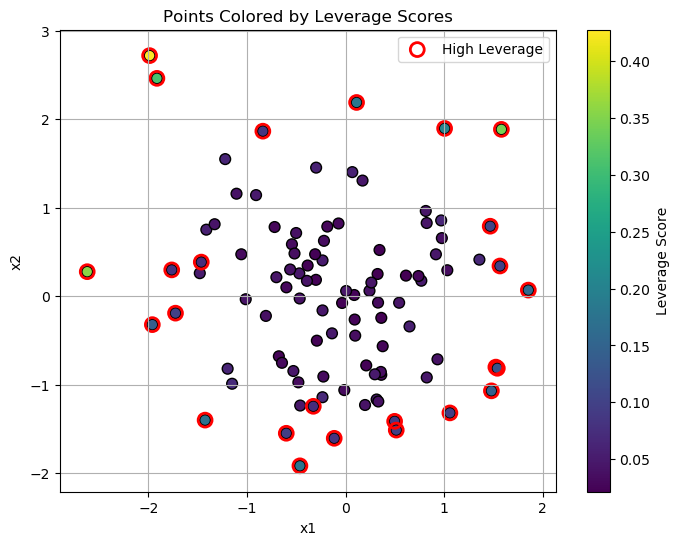

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Data generation
np.random.seed(42)
T = 100
x1 = np.random.normal(0, 1, T)
x2 = np.random.normal(0, 1, T)
t = np.arange(T)

intercept = 5.0
beta1, beta2 = 2.0, -1.5
beta3, beta4, beta5 = 3.0, 1.2, -0.8
delta = 0.4
phi = 0.6

y = np.zeros(T)
eps = np.random.normal(0, 1, T)
y[0] = intercept + beta1*x1[0] + beta2*x2[0] + beta3*x1[0]*x2[0] + beta4*x1[0]**2 + beta5*x2[0]**2 + delta*t[0] + eps[0]
for i in range(1, T):
    y[i] = intercept + beta1*x1[i] + beta2*x2[i] + beta3*x1[i]*x2[i] + beta4*x1[i]**2 + beta5*x2[i]**2 + delta*t[i] + phi*y[i-1] + eps[i]

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Design matrix
X = sm.add_constant(pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x1x2': x1 * x2,
    'x1_sq': x1**2,
    'x2_sq': x2**2,
    't': t
}))
model = sm.OLS(y, X).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag

# Store leverage in DataFrame
df['leverage'] = leverage

# Select high-leverage points (top 25%)
threshold = np.quantile(leverage, 0.75)
high_lev_df = df[df['leverage'] >= threshold]

# --- Plot all points colored by leverage ---
plt.figure(figsize=(8, 6))
sc = plt.scatter(df['x1'], df['x2'], c=df['leverage'], cmap='viridis', s=60, edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Points Colored by Leverage Scores")
plt.colorbar(sc, label="Leverage Score")

# Overlay high leverage points
plt.scatter(high_lev_df['x1'], high_lev_df['x2'], facecolors='none', edgecolors='red', s=100, linewidths=2, label='High Leverage')
plt.legend()
plt.grid(True)
plt.show()


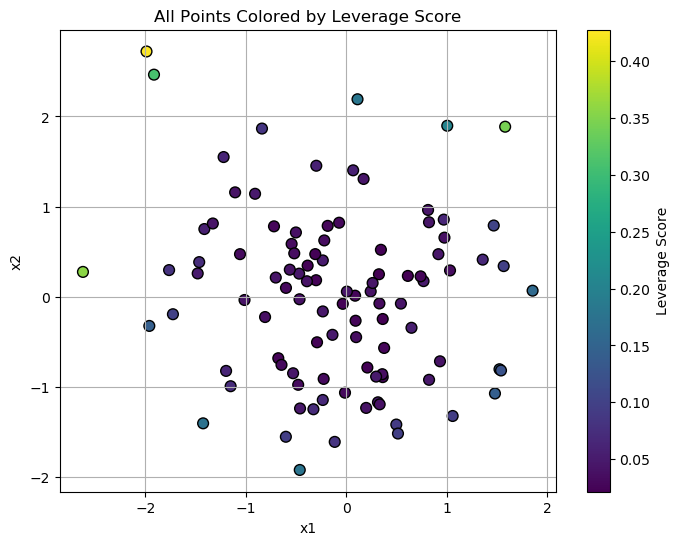

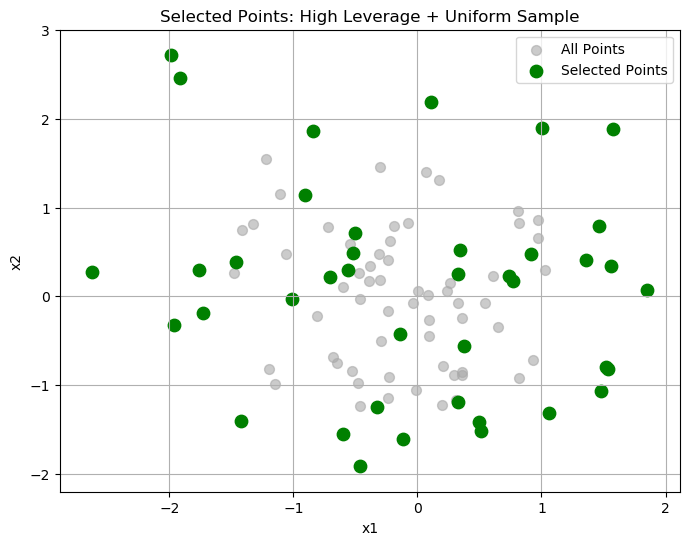

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Data Generation ---
np.random.seed(42)
T = 100
x1 = np.random.normal(0, 1, T)
x2 = np.random.normal(0, 1, T)
t = np.arange(T)

intercept = 5.0
beta1, beta2 = 2.0, -1.5
beta3, beta4, beta5 = 3.0, 1.2, -0.8
delta = 0.4
phi = 0.6

y = np.zeros(T)
eps = np.random.normal(0, 1, T)
y[0] = intercept + beta1*x1[0] + beta2*x2[0] + beta3*x1[0]*x2[0] + beta4*x1[0]**2 + beta5*x2[0]**2 + delta*t[0] + eps[0]
for i in range(1, T):
    y[i] = intercept + beta1*x1[i] + beta2*x2[i] + beta3*x1[i]*x2[i] + beta4*x1[i]**2 + beta5*x2[i]**2 + delta*t[i] + phi*y[i-1] + eps[i]

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# --- Leverage Scores ---
X = sm.add_constant(pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x1x2': x1 * x2,
    'x1_sq': x1**2,
    'x2_sq': x2**2,
    't': t
}))
model = sm.OLS(y, X).fit()
leverage = model.get_influence().hat_matrix_diag
df['leverage'] = leverage

# --- Selective Sampling ---
high_thresh = np.quantile(leverage, 0.75)
high_lev = df[df['leverage'] >= high_thresh]
rest = df[df['leverage'] < high_thresh]

# Sample 30% from the rest
frac_uniform = 0.2
uniform_sample = rest.sample(frac=frac_uniform, random_state=42)

# Combine
selected_df = pd.concat([high_lev, uniform_sample]).sort_index()

# --- Plot 1: All points colored by leverage ---
plt.figure(figsize=(8, 6))
sc = plt.scatter(df['x1'], df['x2'], c=df['leverage'], cmap='viridis', s=60, edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("All Points Colored by Leverage Score")
plt.colorbar(sc, label="Leverage Score")
plt.grid(True)
plt.show()

# --- Plot 2: Selected subset highlighted ---
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['x2'], color='darkgrey', s=50, label='All Points', alpha=0.6)
plt.scatter(selected_df['x1'], selected_df['x2'], color='green', s=80, label='Selected Points')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Selected Points: High Leverage + Uniform Sample")
plt.legend()
plt.grid(True)
plt.show()


In [84]:
# --- Leverage Scores ---
X = sm.add_constant(df_clean[['delta_x1', 'delta_x2', 'delta_interaction', 'delta_x1_sq', 'delta_x2_sq']])
y = df_clean['delta_y']
model = sm.OLS(y, X).fit()
leverage = model.get_influence().hat_matrix_diag
df_clean['leverage'] = leverage

/Users/vayu/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


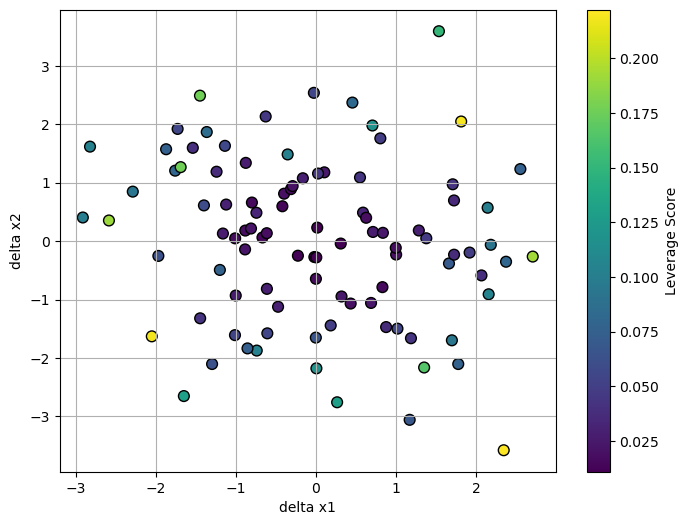

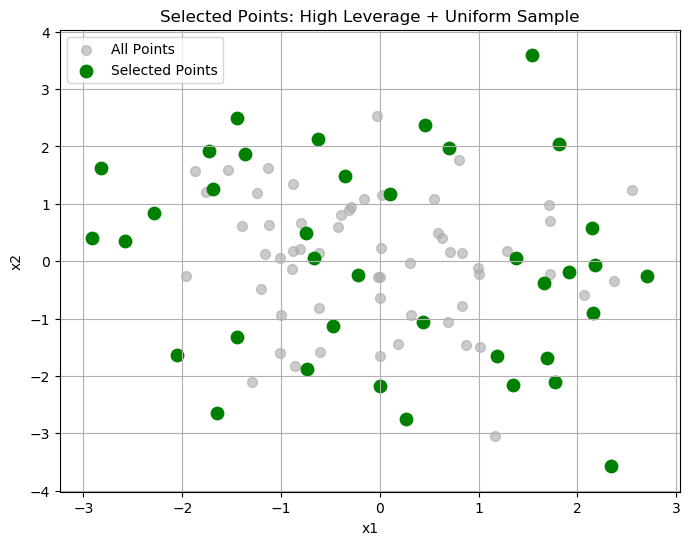

In [85]:
# --- Selective Sampling ---
high_thresh = np.quantile(leverage, 0.75)
high_lev = df_clean[df_clean['leverage'] >= high_thresh]
rest = df_clean[df_clean['leverage'] < high_thresh]

# Sample 30% from the rest
frac_uniform = 0.2
uniform_sample = rest.sample(frac=frac_uniform, random_state=42)

# Combine
selected_df = pd.concat([high_lev, uniform_sample]).sort_index()

# --- Plot 1: All points colored by leverage ---
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_clean['delta_x1'], df_clean['delta_x2'], c=df_clean['leverage'], cmap='viridis', s=60, edgecolor='k')
plt.xlabel("delta x1")
plt.ylabel("delta x2")
#plt.title("All Points Colored by Leverage Score")
plt.colorbar(sc, label="Leverage Score")
plt.grid(True)
plt.show()

# --- Plot 2: Selected subset highlighted ---
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['delta_x1'], df_clean['delta_x2'], color='darkgrey', s=50, label='All Points', alpha=0.6)
plt.scatter(selected_df['delta_x1'], selected_df['delta_x2'], color='green', s=80, label='Selected Points')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Selected Points: High Leverage + Uniform Sample")
plt.legend()
plt.grid(True)
plt.show()

In [86]:
selected_df.describe()

,t,x1,x2,y,delta_y_backward,delta_x1_backward,delta_x2_backward,delta_interaction_backward,delta_x1_sq_backward,delta_x2_sq_backward,...,delta_interaction,delta_x1_sq,delta_x2_sq,delta_y_smooth,delta_x1_smooth,delta_x2_smooth,delta_interaction_smooth,delta_x1_sq_smooth,delta_x2_sq_smooth,leverage
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,44.263158,-0.102282,-0.033847,23.257827,2.101937,0.108511,-0.246099,0.324612,-0.576992,-0.787317,...,-0.072193,0.037845,-0.221126,1.167378,-0.120415,-0.050062,-0.063900,0.047449,-0.178088,0.100988
std,27.788471,0.830010,0.792439,11.490485,7.674475,1.419857,1.541938,1.657354,1.762206,2.070670,...,2.042994,2.578070,2.711217,6.021607,1.029410,1.221519,1.192361,1.417887,1.388864,0.060723
min,2.000000,-2.619745,-1.607483,4.639194,-8.961494,-4.184389,-3.180992,-2.844712,-6.187541,-7.007861,...,-4.971906,-6.855487,-6.664601,-12.695292,-1.650027,-2.191781,-2.773550,-4.607096,-3.205595,0.011881
25%,18.500000,-0.506071,-0.699069,12.370879,-2.338497,-0.695602,-1.654412,-0.574165,-1.334985,-1.746804,...,-1.023306,-1.712067,-1.631890,-1.275964,-0.967038,-1.020202,-0.697478,-0.810920,-1.044554,0.047572
50%,42.500000,-0.042754,0.079941,22.803085,1.263443,0.094189,-0.003696,-0.017937,-0.224579,-0.059627,...,-0.226983,-0.030857,0.003446,1.316492,-0.262501,0.052031,-0.074808,-0.210795,0.047087,0.097770
75%,69.500000,0.353739,0.512074,33.865977,5.627265,0.974978,0.967736,1.073716,0.134962,0.313224,...,0.975651,1.980447,0.708475,3.876091,0.454303,0.778226,0.489122,0.933852,0.836766,0.129838
max,90.000000,1.564644,1.896793,41.377574,24.307303,3.441648,2.311501,5.269082,4.414955,2.922041,...,5.100422,6.861781,6.066859,16.060222,1.865407,2.258345,2.281950,3.102161,2.838925,0.222203


In [87]:
model_diff_nl_centered_leverage = LinearRegression().fit(selected_df[['delta_x1', 'delta_x2', 'delta_interaction', 'delta_x1_sq', 'delta_x2_sq']], selected_df['delta_y'])

In [88]:
# Construct coefficient table
coef_table = pd.DataFrame({
    'True Coef': [intercept, beta1, beta2, beta3, beta4, beta5, delta],
    'Diff_model_centered_leverage': [model_diff_nl_centered_leverage.intercept_] + list(model_diff_nl_centered_leverage.coef_) + [np.nan] * (6 - len(model_diff_nl_centered_leverage.coef_)),
    'Diff_model_centered': [model_diff_nl_centered.intercept_] + list(model_diff_nl_centered.coef_) + [np.nan] * (6 - len(model_diff_nl_centered.coef_)),
}, index=['intercept','Δx1', 'Δx2', 'Δ(x1*x2)', 'Δ(x1^2)', 'Δ(x2^2)', 'time'])

In [89]:
from IPython.display import display, HTML

# Optional: round the values for better display
coef_table_rounded = coef_table.round(3)

# Display as styled HTML table
if autoregressive == True:
    display(Math(r'y_t = \alpha + \beta_1 x_{1,t} + \beta_2 x_{2,t} + \beta_3 x_{1,t} x_{2,t} + \beta_4 x_{1,t}^2 + \beta_5 x_{2,t}^2 + \delta t + \phi y_{t-1} + \varepsilon_t'))
else:
    display(Math(r'y_t = \alpha + \beta_1 x_{1,t} + \beta_2 x_{2,t} + \beta_3 x_{1,t} x_{2,t} + \beta_4 x_{1,t}^2 + \beta_5 x_{2,t}^2 + \delta t + \varepsilon_t'))
display(HTML(coef_table_rounded.to_html()))

<IPython.core.display.Math object>

,True Coef,Diff_model_centered_leverage,Diff_model_centered
intercept,5.0,1.044,0.999
Δx1,2.0,2.078,2.046
Δx2,-1.5,-1.391,-1.381
Δ(x1*x2),3.0,3.121,3.101
Δ(x1^2),1.2,1.042,1.015
Δ(x2^2),-0.8,-0.700,-0.670
time,0.4,NaN,NaN
